# Visualization Homework

#### Data Cleaning

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Car_Insurance_Claim.csv")

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "ID"], inplace=True)

# Convert numerical columns to the correct format
num_cols = ["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Median for numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # Mode for categorical columns

df.head()


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0.0,0.0,0.0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0.0,0.0,0.0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0.0,0.0,0.0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,none,32765,11000.0,sedan,0.0,0.0,0.0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0.0,1.0,1.0


### Descriptive Statistics

In [32]:
# Statistics for numerical columns
print(df.describe())

# Frequency distribution for categorical columns
print(df.describe(include="object"))


       CREDIT_SCORE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS         DUIS  \
count  10000.000000    10000.000000          10000.00000  10000.00000   
mean       0.516790    11730.100000              1.46710      0.23650   
std        0.130015     2669.900153              2.23379      0.55299   
min        0.053358     2000.000000              0.00000      0.00000   
25%        0.432593    10000.000000              0.00000      0.00000   
50%        0.524905    12000.000000              0.00000      0.00000   
75%        0.606510    13000.000000              2.00000      0.00000   
max        0.960819    22000.000000             22.00000      6.00000   

       PAST_ACCIDENTS       OUTCOME  
count    10000.000000  10000.000000  
mean         1.046800      0.310500  
std          1.648782      0.462721  
min          0.000000      0.000000  
25%          0.000000      0.000000  
50%          0.000000      0.000000  
75%          2.000000      1.000000  
max         15.000000      1.000000  


### Data Visualization

C:\Users\voins\AppData\Local\Temp\ipykernel_1812\124353924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="OUTCOME", data=df, palette="coolwarm")


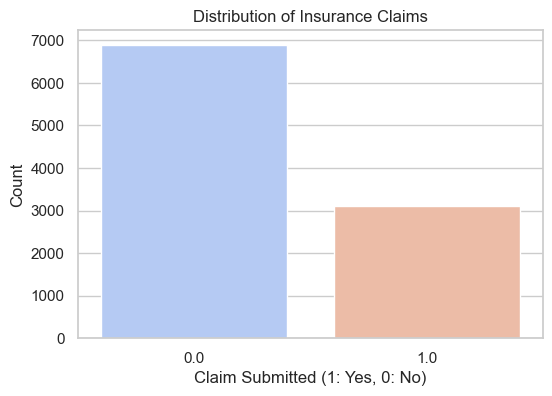

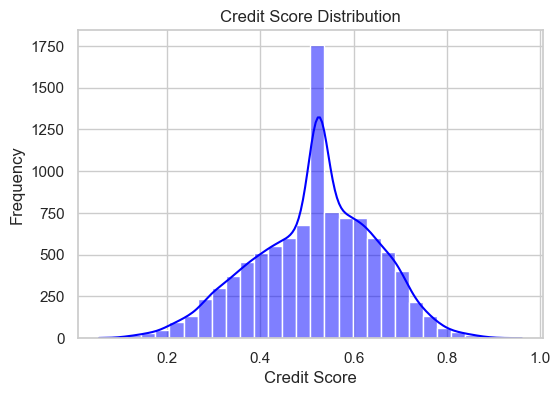

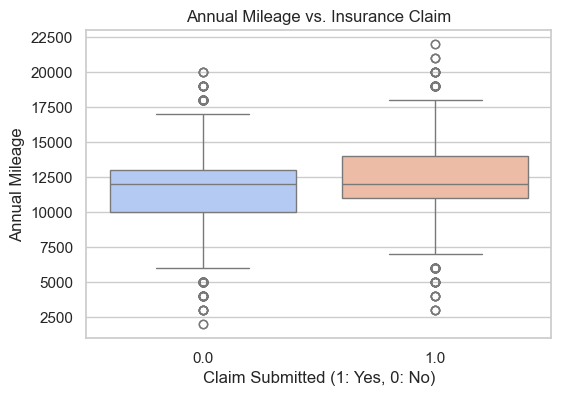

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Histogram of insurance claim outcomes
plt.figure(figsize=(6, 4))
sns.countplot(x="OUTCOME", data=df, palette="coolwarm")
plt.title("Distribution of Insurance Claims")
plt.xlabel("Claim Submitted (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

# Histogram of credit score distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["CREDIT_SCORE"], bins=30, kde=True, color="blue")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot of annual mileage based on insurance claim submission
plt.figure(figsize=(6, 4))
sns.boxplot(x="OUTCOME", y="ANNUAL_MILEAGE", data=df, hue="OUTCOME", palette="coolwarm", legend=False)
plt.title("Annual Mileage vs. Insurance Claim")
plt.xlabel("Claim Submitted (1: Yes, 0: No)")
plt.ylabel("Annual Mileage")
plt.show()


### Correlation between numeric variables

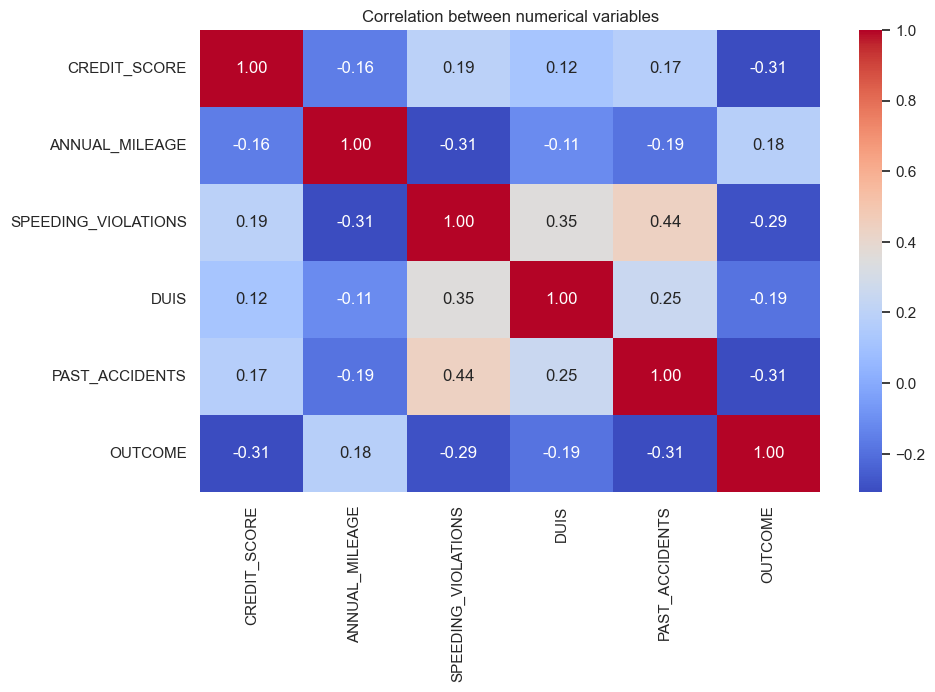

In [34]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=["number"])

# Plot heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numerical variables")
plt.show()


### Correlation between all variables after coding

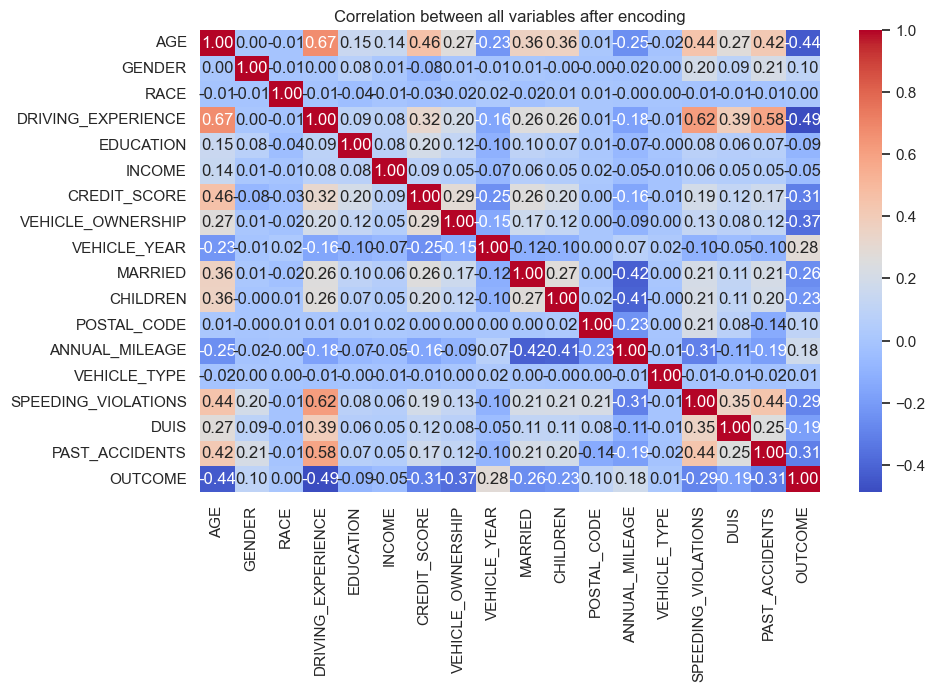

In [35]:
# Copy of the dataframe for processing
df_encoded = df.copy()

# Convert all categorical variables into numerical format
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df[col])

# Plot the correlation matrix after encoding
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between all variables after encoding")
plt.show()


### **Conclutions**

1. **Correlation Insights:**
* CREDIT_SCORE and OUTCOME: A negative correlation (-0.31 to -0.44) suggests that customers with higher credit scores are less likely to file claims.

* ANNUAL_MILEAGE and OUTCOME: A positive correlation (0.18) suggests that individuals with higher mileage have a slightly higher chance of making a claim.

* SPEEDING_VIOLATIONS, DUIS, and PAST_ACCIDENTS: These features have a moderate correlation with each other and with the outcome variable, indicating that reckless driving behavior increases the likelihood of claims.

* AGE and OUTCOME: Older individuals have a lower likelihood of making a claim (-0.44 correlation), likely due to more cautious driving behavior.

2. **Risk Factors Affecting Claims**:
* Driving History: Individuals with past accidents, DUIs, and speeding violations are more likely to file claims.

* Vehicle Ownership & Age: Older vehicles and non-owned vehicles seem to have a slight correlation with higher claim rates.

* Demographic Factors: Some demographic features such as marital status and number of children showed weak correlations with claim filing.

3. **Policy Improvement Recommendations**:
*Stricter Policies for High-Risk Drivers: Implement targeted policies for customers with a history of accidents or DUIs.

* Credit-Based Risk Assessment: Consider using credit scores as a factor in pricing insurance policies.

* Mileage-Based Premium Adjustments: Offer mileage-based insurance pricing since annual mileage correlates with claim frequency.

* Targeted Customer Engagement: Younger drivers and those with risky driving behaviors should be given educational resources and incentives for safer driving.